In [1]:
# The following notebook uses the package extremes to fit a GEV model to
# series of annual maximum rainfall at multiple locations.
# Input data format: annual maximum series for each location by columns.
# Length of annual maximum series does not have to be the same for each location,
# however, if the AMS come from a gridded data source, all columns should have the same
# number of years and annual maxima.

# To install the library extremes and other required libraries in this notebook,
# uncomment the lines below and run the cell.

# install.packages('extrEmes')
# install.packages('glue')

In [2]:
library(extRemes)
library(glue)

Loading required package: Lmoments
Loading required package: distillery

Attaching package: ‘extRemes’

The following objects are masked from ‘package:stats’:

    qqnorm, qqplot



In [3]:
# Define input and output data files:
infile <- "station_data/ams_all_stations_1950_2000.csv"
outfile <- "station_data/gev_params_all_stations.csv"

In [4]:
# Read data into the notebook (might take some time because of file size):
ams <- read.csv(file=infile, header=T, sep=",")

In [6]:
# Check the size of the dataframe: number of years, length of AMS and number of grids
print(glue("Number of years: {nrow(ams)}"))
print(glue("Number of stations: {ncol(ams)}"))


Number of years: 51
Number of stations: 459


In [7]:
# Setting up the data in the required format by the library extremes, and
# creating the output matrix that will be saved as a csv in the outfile path specified above

model.name <- colnames(ams)
f = (length(model.name))
model.name <- colnames(ams)[c(2:f)]
rl.cals <- data.frame(matrix(ncol = 10, nrow = length(model.name)))
colnames(rl.cals) <- c("models", "L_loc", "loc", "U_loc",
                             "L_scale", "scale", "U_scale",
                             "L_shape", "shape", "U_shape")
rl.cals[1] <- as.vector(model.name)

In [8]:
# We will populate this matrix with the estimated parameters from the fit to each row,
# which corresponds to each grid in the gridded dataset.

rl.cals

models,L_loc,loc,U_loc,L_scale,scale,U_scale,L_shape,shape,U_shape
USC00469436,NA,NA,NA,NA,NA,NA,NA,NA,NA
USC00465224,NA,NA,NA,NA,NA,NA,NA,NA,NA
USW00024286,NA,NA,NA,NA,NA,NA,NA,NA,NA
USC00365902,NA,NA,NA,NA,NA,NA,NA,NA,NA
USW00094790,NA,NA,NA,NA,NA,NA,NA,NA,NA
USC00445453,NA,NA,NA,NA,NA,NA,NA,NA,NA
USC00464264,NA,NA,NA,NA,NA,NA,NA,NA,NA
USC00301664,NA,NA,NA,NA,NA,NA,NA,NA,NA
USC00446012,NA,NA,NA,NA,NA,NA,NA,NA,NA
USC00300220,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [25]:
# This for loop takes each column and tries to fit a GEV distribution to the,
# the AMS data using Maximum Likelihood Estimation method. 
# The confidence interval used to compute the upper and lower bounds of the,
# parameters is specified via the alpha parameters in the function call. The default
# method to compute the bounds in the extremes library is via bootstrapping.
# Using alpha=0.1 to get the bounds at the same confidence level than Atlas 14
# If the fitting method failed, the cell id will be printed.

# Again, might take some time due to the amount of data.

for (model in 2:3) {
    md = as.vector(ams[, (model)])
    md <- md[!is.na(md)]
    id_ <- model.name[model-1]
    tryCatch({
        fit_mle <- fevd(md, method='MLE', type='GEV')

        param.loc <- as.vector(ci(fit_mle, alpha=0.1, type='parameter')[1,])
        param.scale <- as.vector(ci(fit_mle, alpha=0.1, type='parameter')[2,])
        param.shape <- as.vector(ci(fit_mle, alpha=0.1, type='parameter')[3,])

        rl.cals.single <- c(param.loc,param.scale, param.shape)
        rl.cals[model-1, c(2:10)] <- rl.cals.single},
        error = function(e){ message(" ", glue('{id_},'))
        })
    }

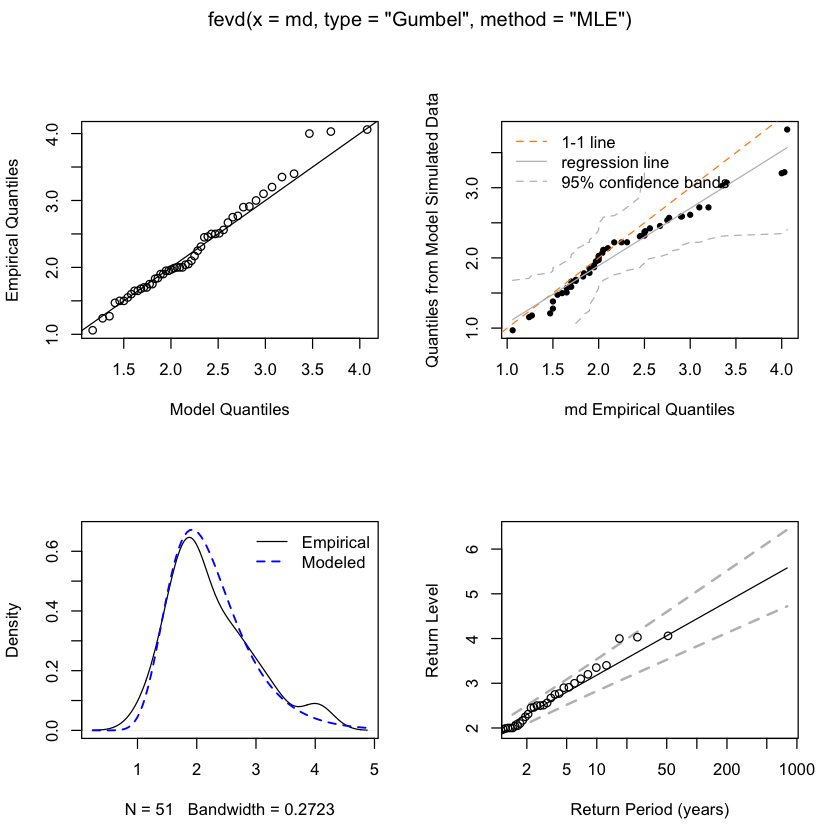

In [16]:
plot(fit_mle)

In [12]:
# No more errors.


# There are approximately 456 grids out of 35518 grids where GEV model could not
# be fit. Investigate source of error. Fit failed for grid id_19_235:

#ams[,"id_19_135"]dd

In [21]:
# Error was solved.

# The fourth element is a NA value; we will need to verify the netCDF data again for
# this grid cell, possibly this is the same error in other gridcells.

write.csv(rl.cals, outfile)